In [1]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

Analisi

In [3]:
data=pd.read_excel('./biofouling-database-may-2020.xlsx',engine='openpyxl')
data

,"Realm (Spalding et al., 2007)","Province (Spalding et al., 2007)","Ecoregion (Spalding et al., 2007)",Country-City/Region,Site,Coordinates,Distance to land (Km),Equipment,Fouling period,F.P. min (months),...,Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2),Max thickness sample (mm),Max weight sample,Max size organisms (mm),Max weight organisms,"Group (WoRMS, AlgaeBase)","Sub-group (WoRMS, AlgaeBase)","Species (WoRMS, AlgaeBase)","Common name (WoRMS, AlgaeBase)",Reference
0,Temperate Northern Atlantic,Lusitanean,South European Atlantic Shelf,France-Le Croisic,SEM-REV marine test site,"47º16'58.80''N, 2º39'54.00''W",20,Floating wind turbine mooring,17-19,17,...,"Sample: 90 mm, 12.9 Kg FW m-1",90,12.9,NaN,NaN,Ph. Mollusca,Cl. Bivalvia,Mytilus edulis,"Common mussel, Blue mussel","Spraul et al., 2017"
1,Temperate Northern Atlantic,Lusitanean,South European Atlantic Shelf,Portugal-Almagreira (Peniche),AW-Energy WaveRoller test site,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,...,NaN,83.7 (at 10m),33.5 (at 5m),NaN,NaN,Cl. Polychaeta,F. Serpulidae,Hydroides sp.,Tubeworm,OCEANIC Project
2,Temperate Northern Atlantic,Lusitanean,South European Atlantic Shelf,Portugal-Almagreira (Peniche),AW-Energy WaveRoller test site,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,...,NaN,83.7 (at 10m),33.5 (at 5m),NaN,NaN,Cl. Polychaeta,F. Serpulidae,Spirobranchus sp.,Christmas tree worms,OCEANIC Project
3,Temperate Northern Atlantic,Lusitanean,South European Atlantic Shelf,Portugal-Almagreira (Peniche),AW-Energy WaveRoller test site,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,...,NaN,83.7 (at 10m),33.5 (at 5m),NaN,NaN,Cl. Polychaeta,F. Serpulidae,Spirorbinae,Tubeworm,OCEANIC Project
4,Temperate Northern Atlantic,Lusitanean,South European Atlantic Shelf,Portugal-Almagreira (Peniche),AW-Energy WaveRoller test site,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,...,NaN,83.7 (at 10m),33.5 (at 5m),NaN,3.67 (at 10m),Ph. Bryozoa,Ph. Bryozoa,Bryozoan,Bryozoan,OCEANIC Project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,Arctic,Arctic,White Sea,Russia-Gulf of Kandalaksha,Krugalya Bay,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2-13,2,...,NaN,NaN,0.7,NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Balanus crenatus,Acorn barnacle,"Khalaman et al., 2016"
482,Arctic,Arctic,White Sea,Russia-Gulf of Kandalaksha,Krugalya Bay,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2-13,2,...,NaN,NaN,0.7,NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Verruca stroemia,Asymetrical barnacle,"Khalaman et al., 2016"
483,Arctic,Arctic,White Sea,Russia-Gulf of Kandalaksha,Krugalya Bay,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2-13,2,...,NaN,NaN,0.7,NaN,0.021 (Bryozoans),Ph. Bryozoa,Cl. Gymnolaemata,Crisiella producta,Bryozoan,"Khalaman et al., 2016"
484,Arctic,Arctic,White Sea,Russia-Gulf of Kandalaksha,Krugalya Bay,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2-13,2,...,NaN,NaN,0.7,NaN,NaN,Ph. Bryozoa,Cl. Gymnolaemata,Electra pilosa,Hairy sea-mat,"Khalaman et al., 2016"


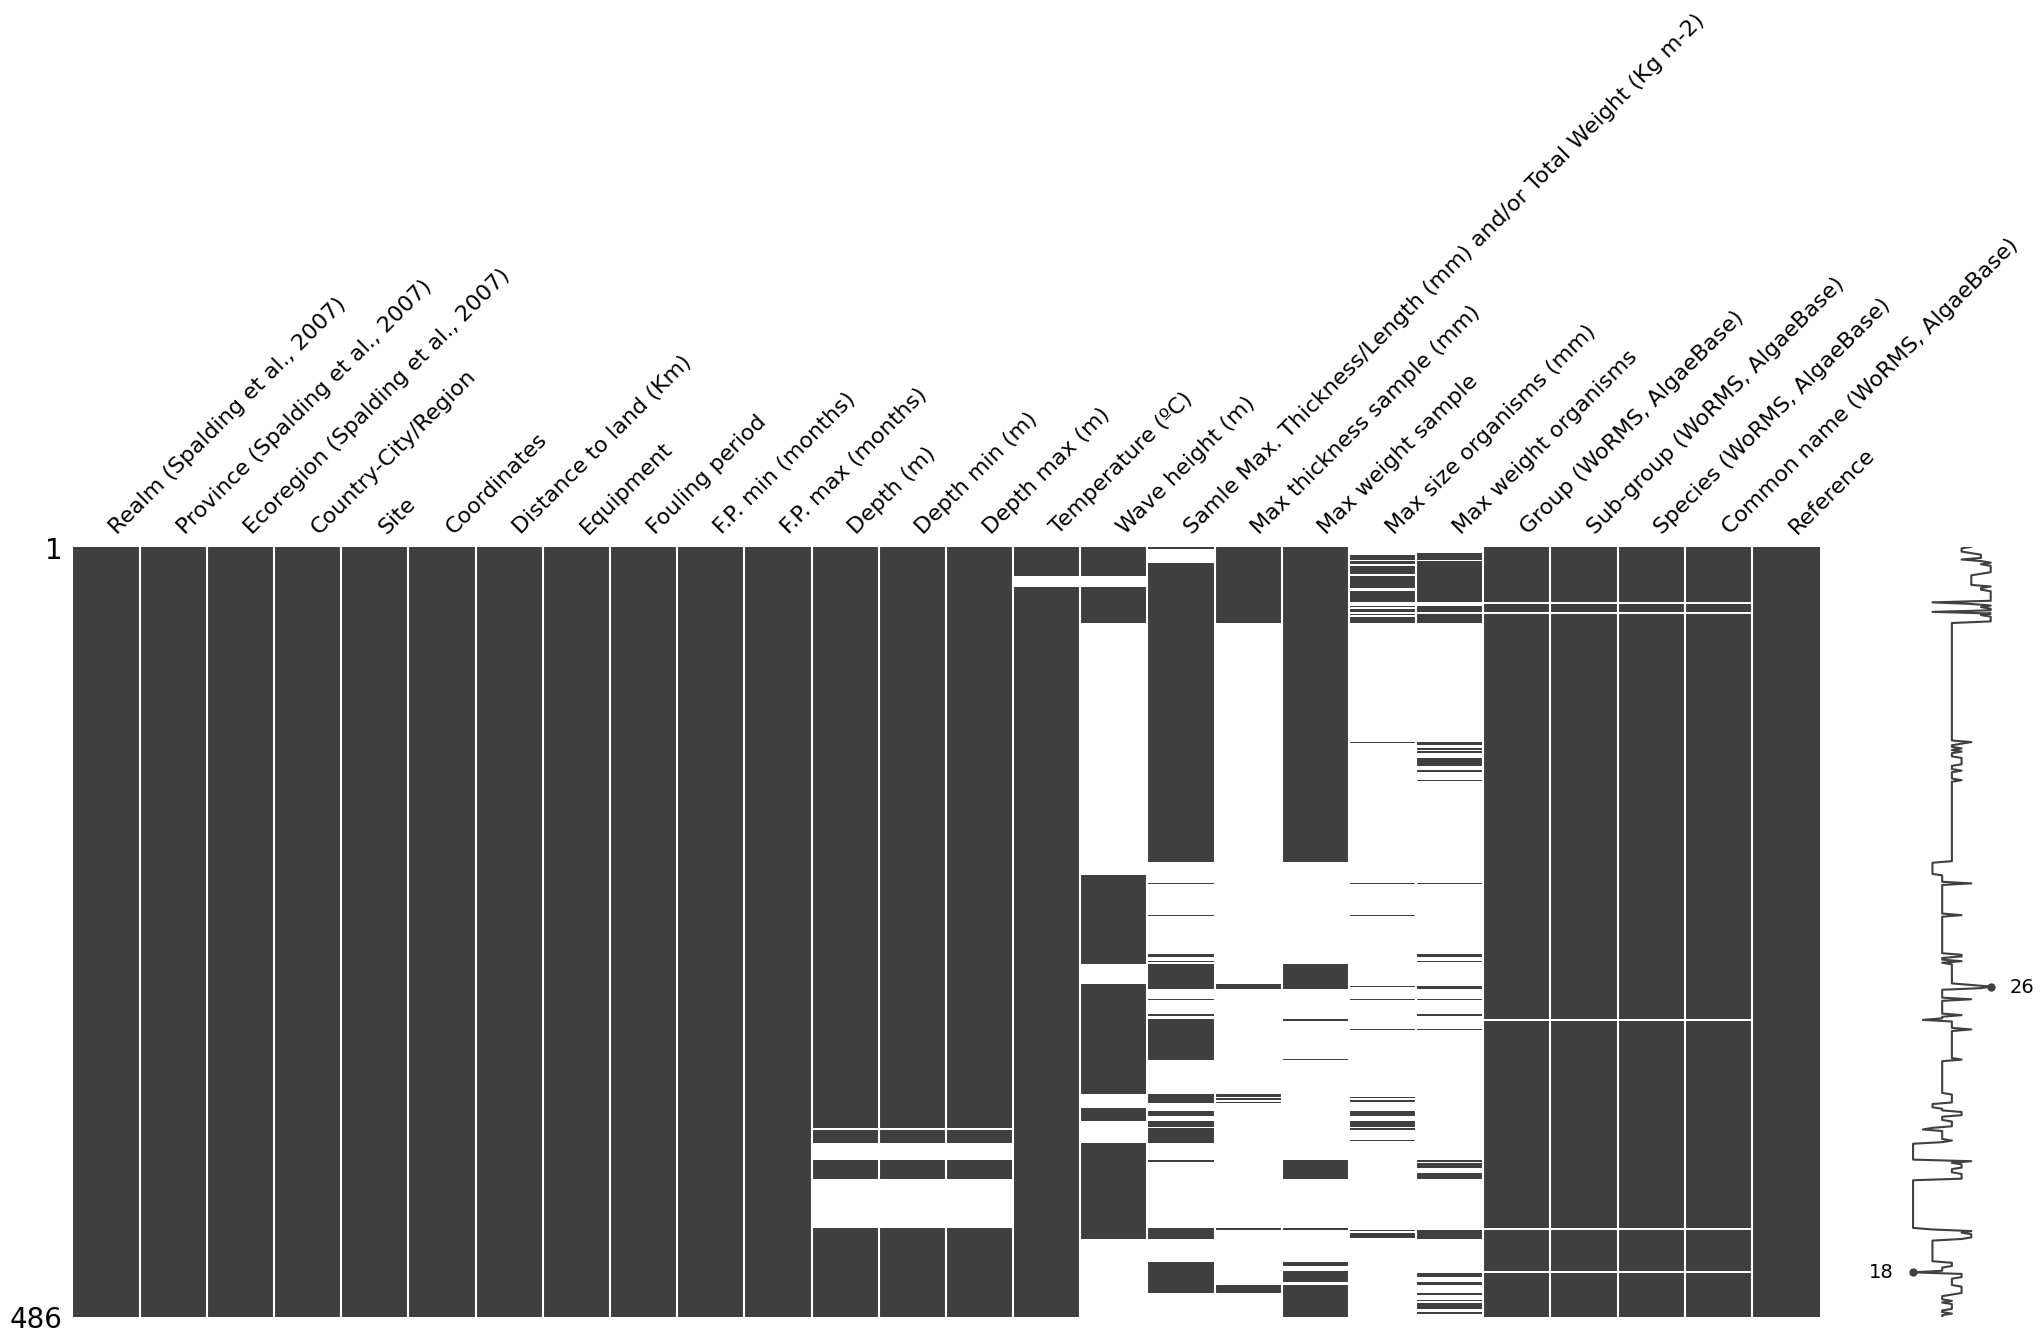

In [4]:
ms.matrix(data)
plt.show()

In [5]:
data.columns

Index(['Realm (Spalding et al., 2007)', 'Province (Spalding et al., 2007)',
       'Ecoregion (Spalding et al., 2007)', 'Country-City/Region', 'Site',
       'Coordinates', 'Distance to land (Km)', 'Equipment', 'Fouling period',
       'F.P. min (months)', 'F.P. max (months)', 'Depth (m)', 'Depth min (m)',
       'Depth max (m)', 'Temperature (ºC) ', 'Wave height (m)',
       'Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2)',
       'Max thickness sample (mm)', 'Max weight sample',
       'Max size organisms (mm)', 'Max weight organisms',
       'Group (WoRMS, AlgaeBase)', 'Sub-group (WoRMS, AlgaeBase)',
       'Species (WoRMS, AlgaeBase)', 'Common name (WoRMS, AlgaeBase)',
       'Reference'],
      dtype='object')

In [6]:
data=data.drop(columns={'Realm (Spalding et al., 2007)', 'Province (Spalding et al., 2007)',
       'Ecoregion (Spalding et al., 2007)', 'Country-City/Region', 'Site','Fouling period','Wave height (m)', 'Max weight sample',
       'Max size organisms (mm)', 'Max weight organisms','Reference'})
data

,Coordinates,Distance to land (Km),Equipment,F.P. min (months),F.P. max (months),Depth (m),Depth min (m),Depth max (m),Temperature (ºC),Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2),Max thickness sample (mm),"Group (WoRMS, AlgaeBase)","Sub-group (WoRMS, AlgaeBase)","Species (WoRMS, AlgaeBase)","Common name (WoRMS, AlgaeBase)"
0,"47º16'58.80''N, 2º39'54.00''W",20,Floating wind turbine mooring,17,19,0-25?,0?,25?,13.9 ± 4.1***,"Sample: 90 mm, 12.9 Kg FW m-1",90,Ph. Mollusca,Cl. Bivalvia,Mytilus edulis,"Common mussel, Blue mussel"
1,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Hydroides sp.,Tubeworm
2,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Spirobranchus sp.,Christmas tree worms
3,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Spirorbinae,Tubeworm
4,"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Ph. Bryozoa,Ph. Bryozoa,Bryozoan,Bryozoan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Balanus crenatus,Acorn barnacle
482,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Verruca stroemia,Asymetrical barnacle
483,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,Ph. Bryozoa,Cl. Gymnolaemata,Crisiella producta,Bryozoan
484,"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,Ph. Bryozoa,Cl. Gymnolaemata,Electra pilosa,Hairy sea-mat


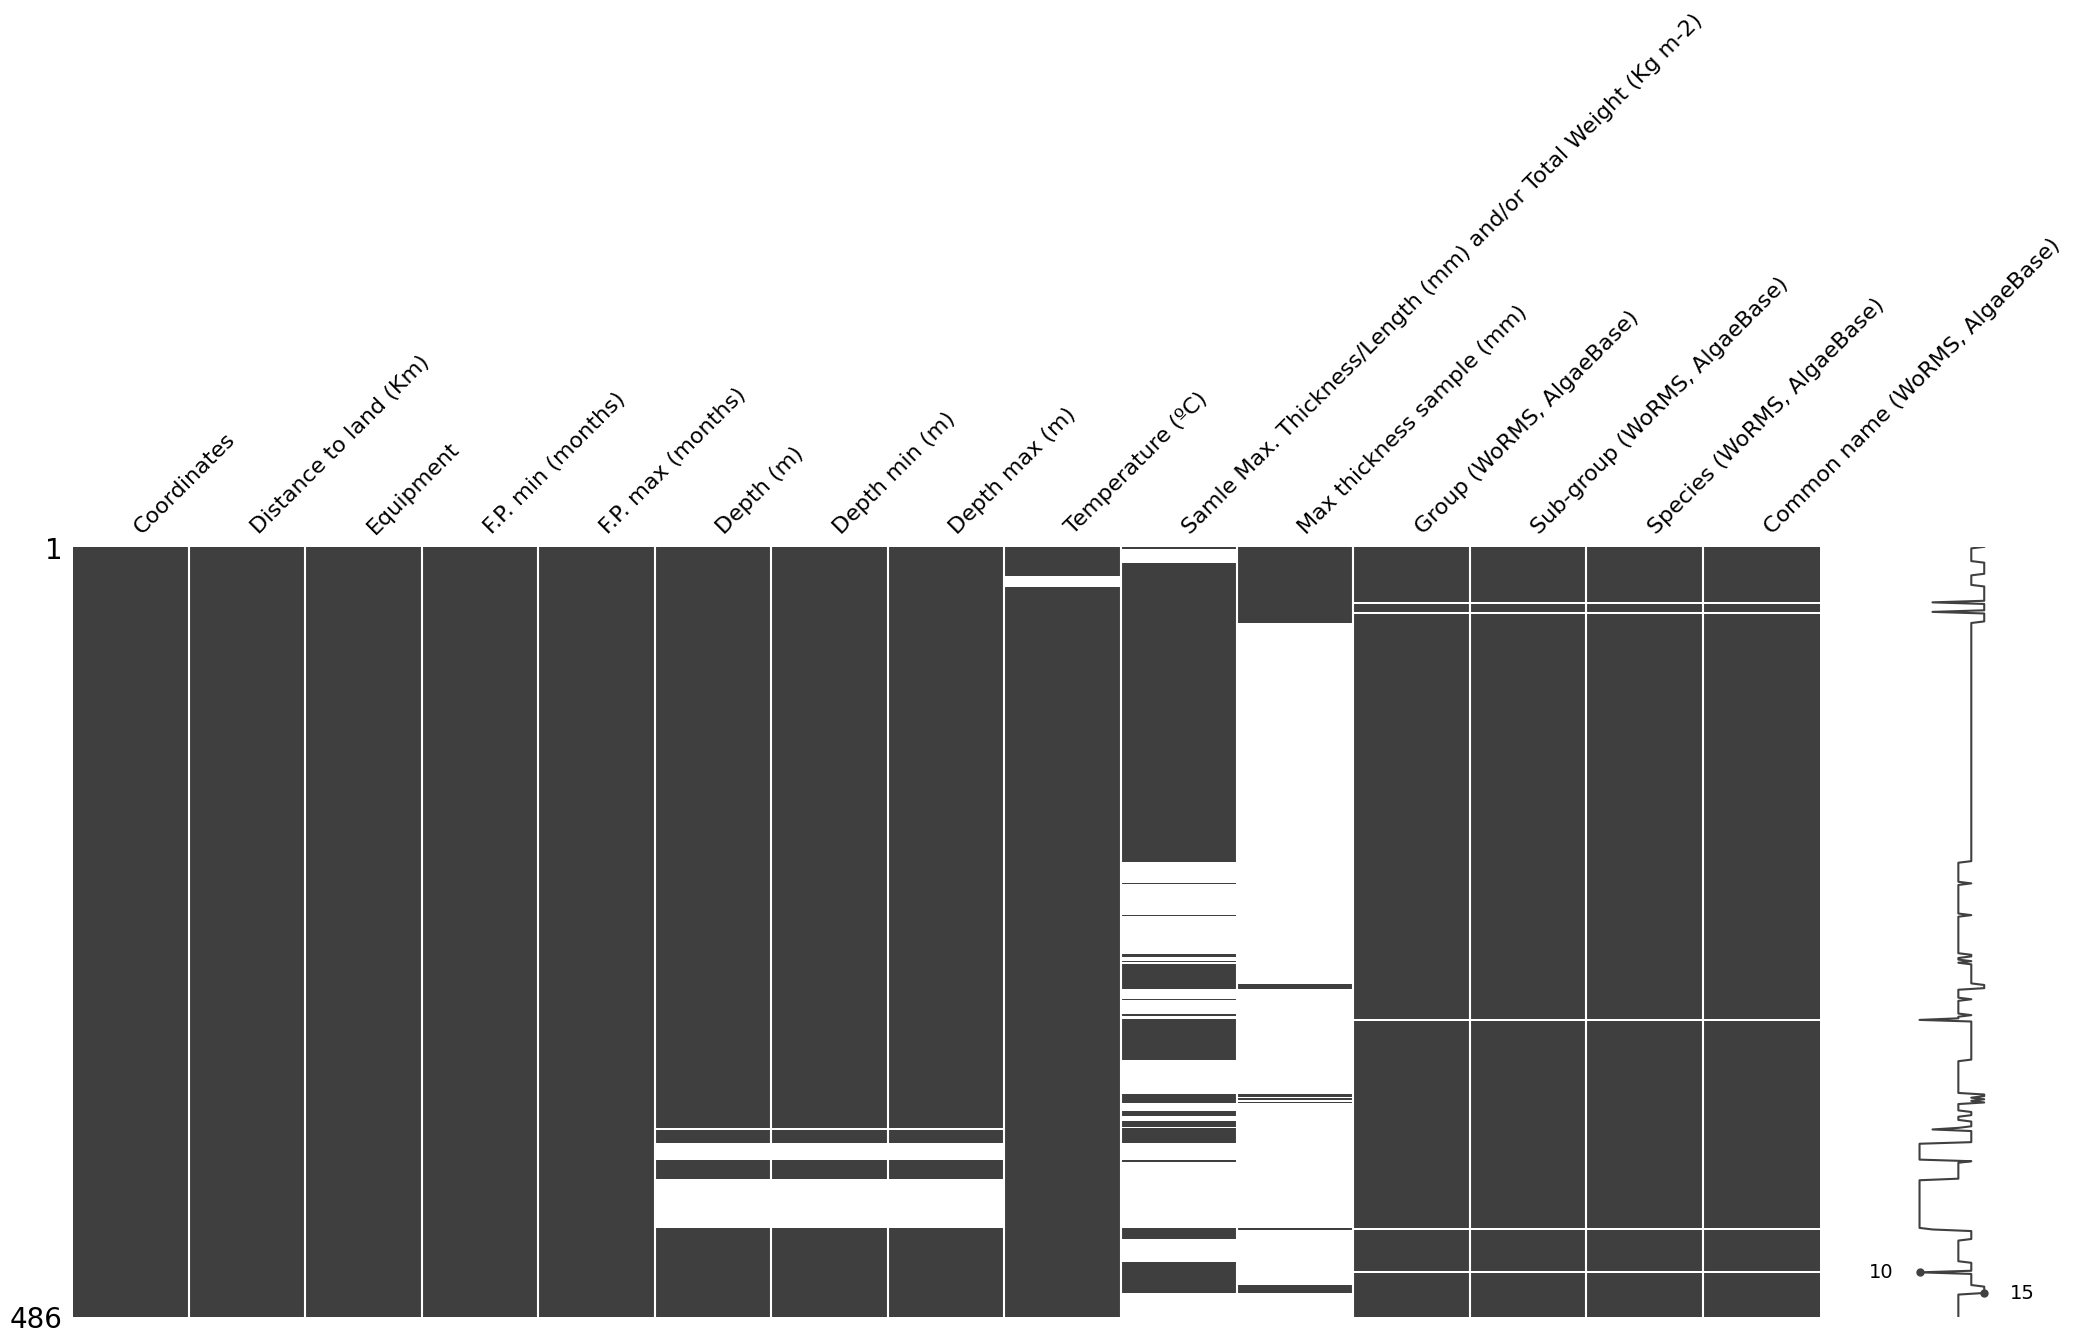

In [7]:
ms.matrix(data)
plt.show()

In [8]:
data=data.set_index('Coordinates')
data

,Distance to land (Km),Equipment,F.P. min (months),F.P. max (months),Depth (m),Depth min (m),Depth max (m),Temperature (ºC),Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2),Max thickness sample (mm),"Group (WoRMS, AlgaeBase)","Sub-group (WoRMS, AlgaeBase)","Species (WoRMS, AlgaeBase)","Common name (WoRMS, AlgaeBase)"
Coordinates,,,,,,,,,,,,,,
"47º16'58.80''N, 2º39'54.00''W",20,Floating wind turbine mooring,17,19,0-25?,0?,25?,13.9 ± 4.1***,"Sample: 90 mm, 12.9 Kg FW m-1",90,Ph. Mollusca,Cl. Bivalvia,Mytilus edulis,"Common mussel, Blue mussel"
"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Hydroides sp.,Tubeworm
"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Spirobranchus sp.,Christmas tree worms
"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Cl. Polychaeta,F. Serpulidae,Spirorbinae,Tubeworm
"39°22'56.64""N, 9°18'58.68""W",0.4,Metallic and plastic panels,12,12,"5, 10",5,10,12.9 (January) - 20.2 (August)*/**,NaN,83.7 (at 10m),Ph. Bryozoa,Ph. Bryozoa,Bryozoan,Bryozoan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Balanus crenatus,Acorn barnacle
"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,S.Ph. Crustacea,I.Cl. Cirripedia,Verruca stroemia,Asymetrical barnacle
"66º20'14.4''N, 33º38'12.6''E",0.1,Ceramic plates,2,13,1.5,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,NaN,Ph. Bryozoa,Cl. Gymnolaemata,Crisiella producta,Bryozoan


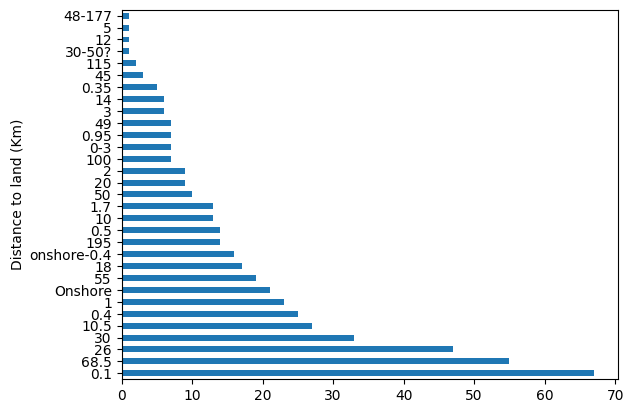

In [9]:
data['Distance to land (Km)'].value_counts().plot(kind='barh')
plt.show()

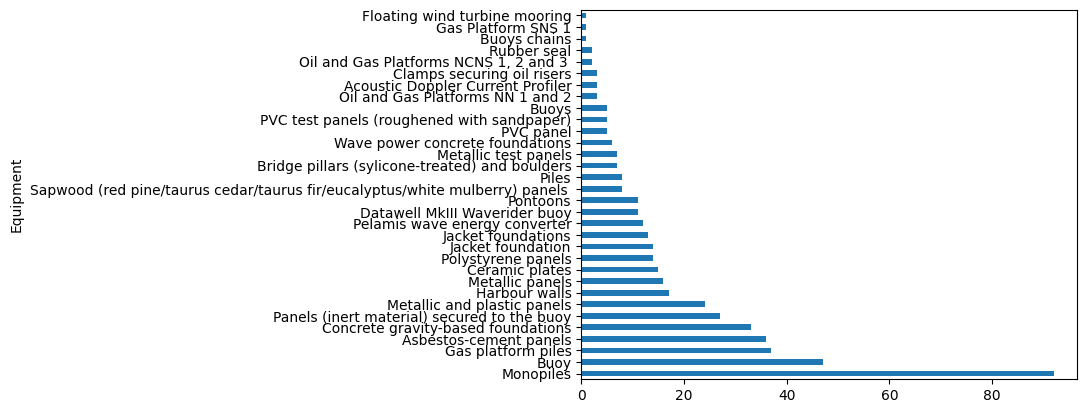

In [10]:
data['Equipment'].value_counts().plot(kind='barh')
plt.show()

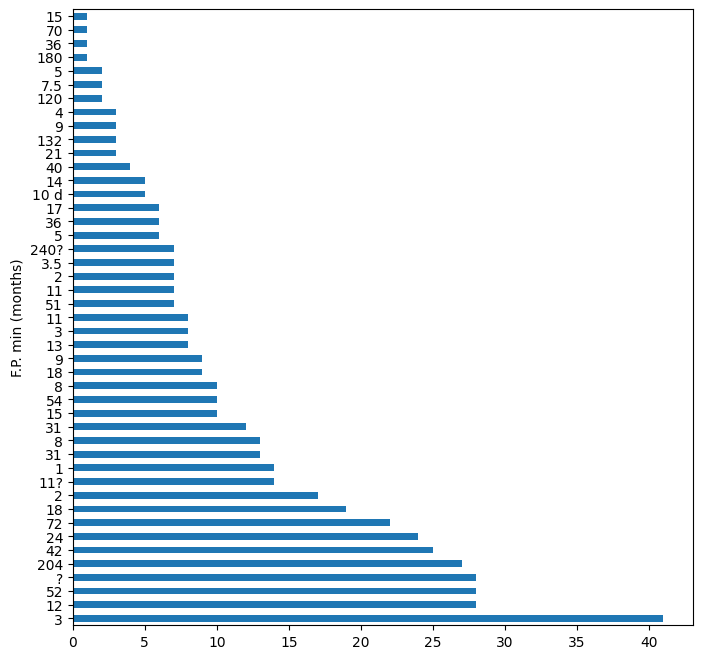

In [11]:
data['F.P. min (months)'].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

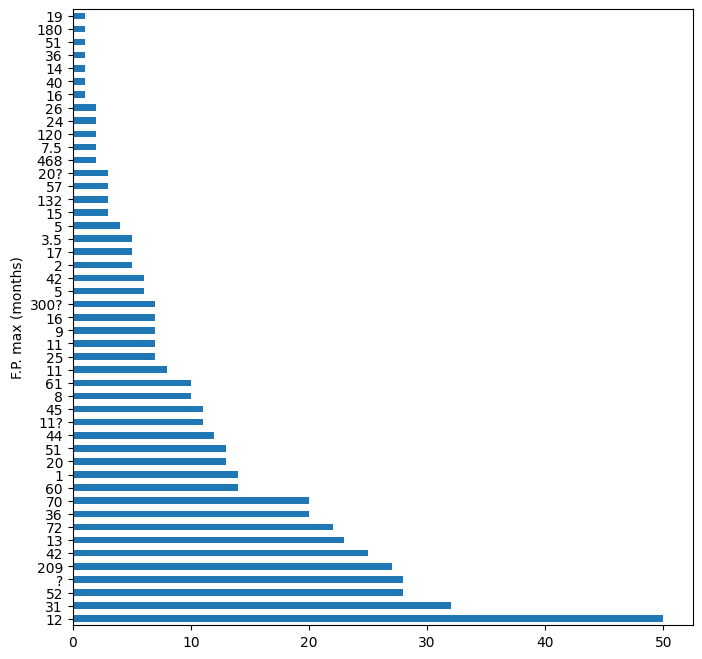

In [12]:
data['F.P. max (months)'].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

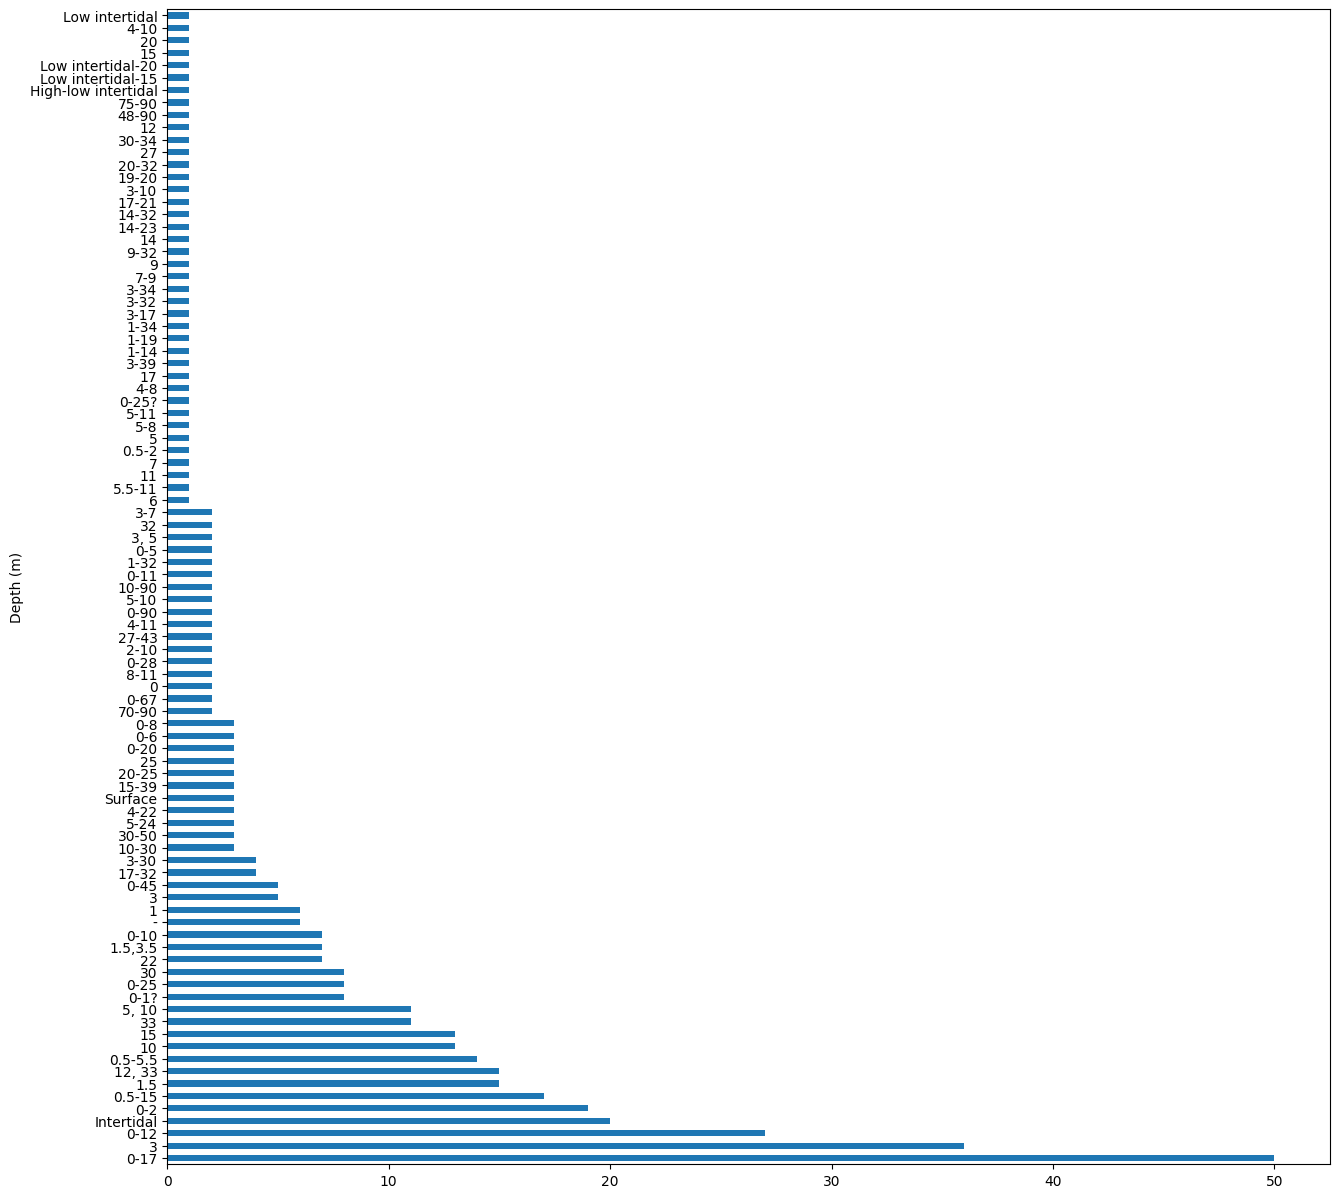

In [13]:
data['Depth (m)'].value_counts().plot(kind='barh',figsize=(15,15))
plt.show()

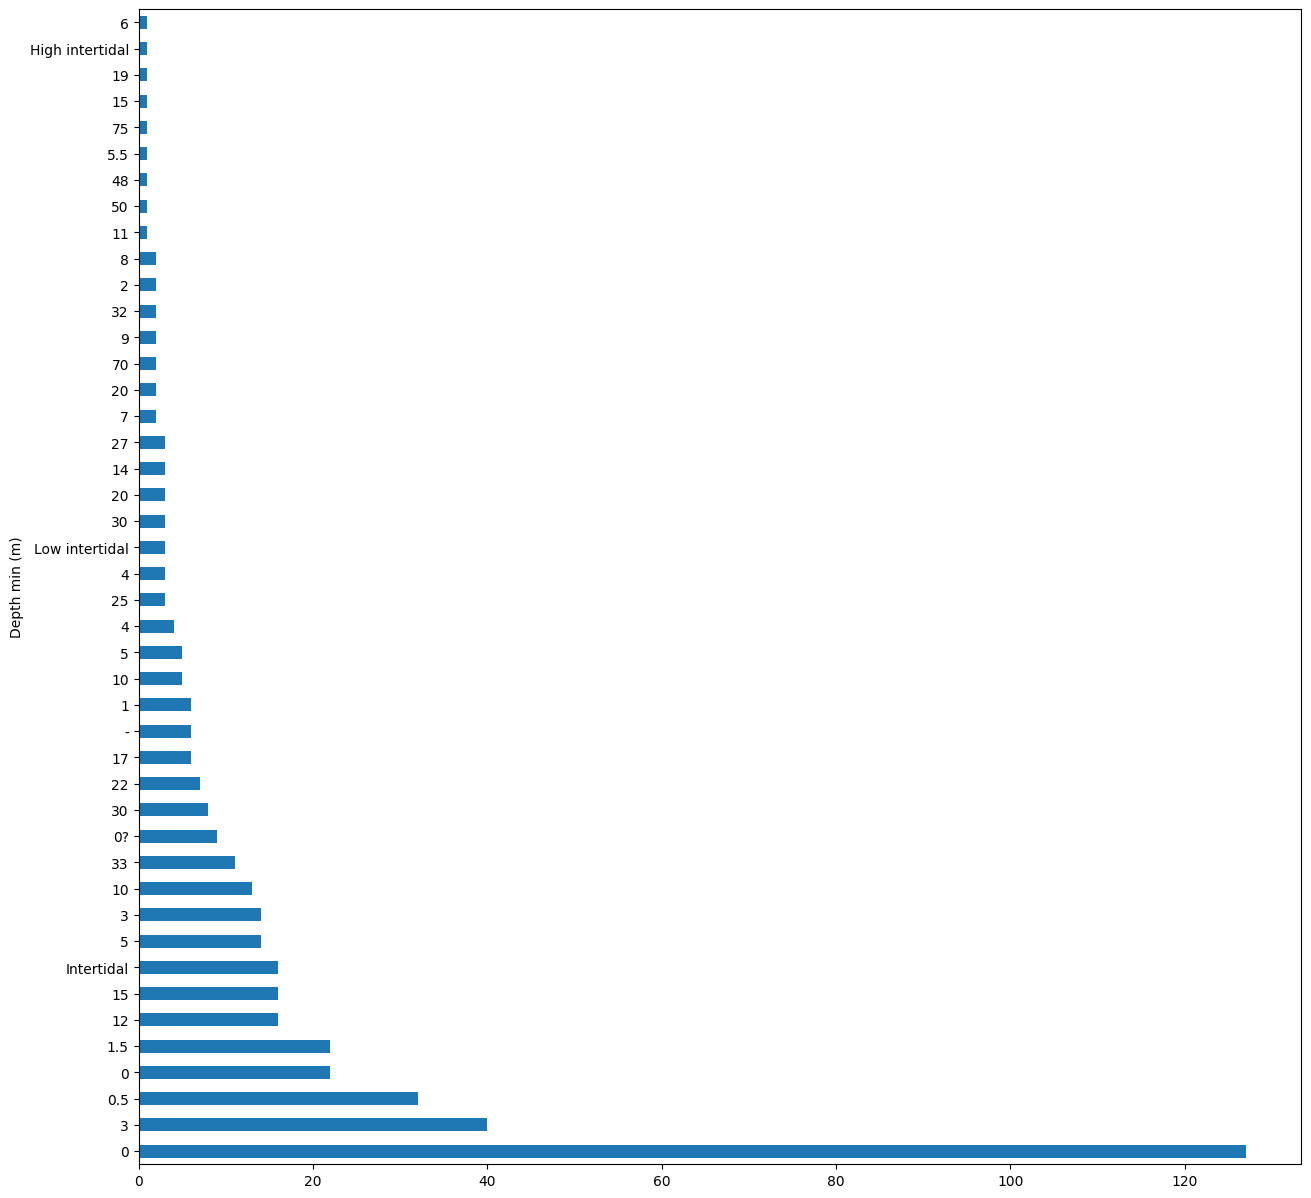

In [14]:
data['Depth min (m)'].value_counts().plot(kind='barh',figsize=(15,15))
plt.show()

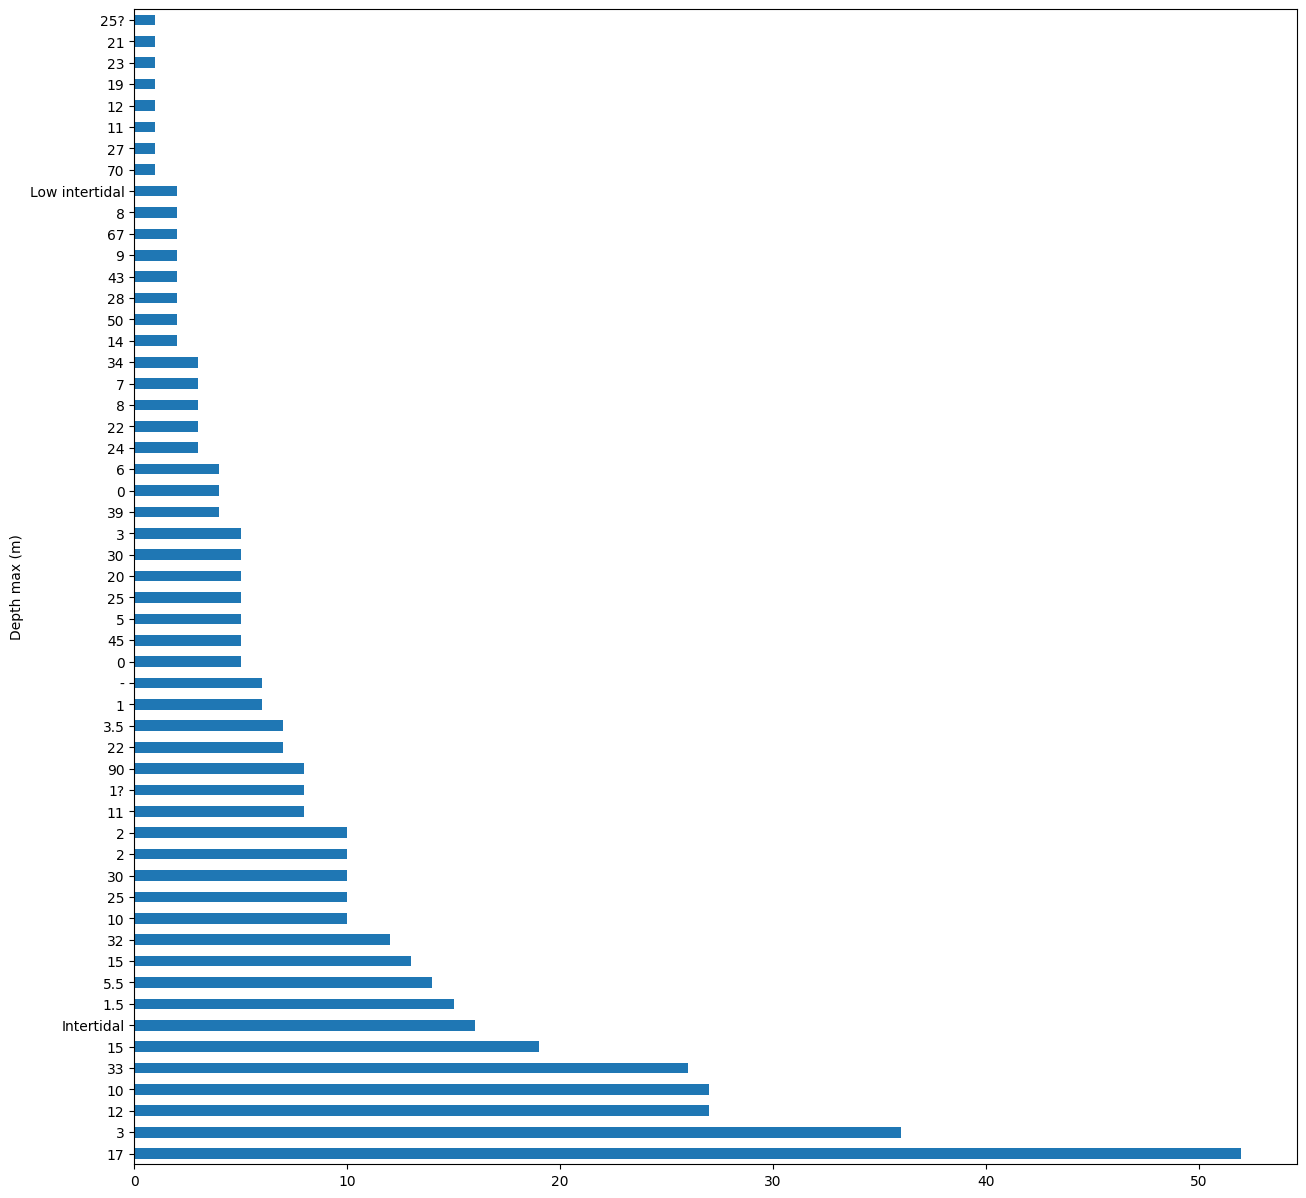

In [15]:
data['Depth max (m)'].value_counts().plot(kind='barh',figsize=(15,15))
plt.show()

Vedi excel per fixare

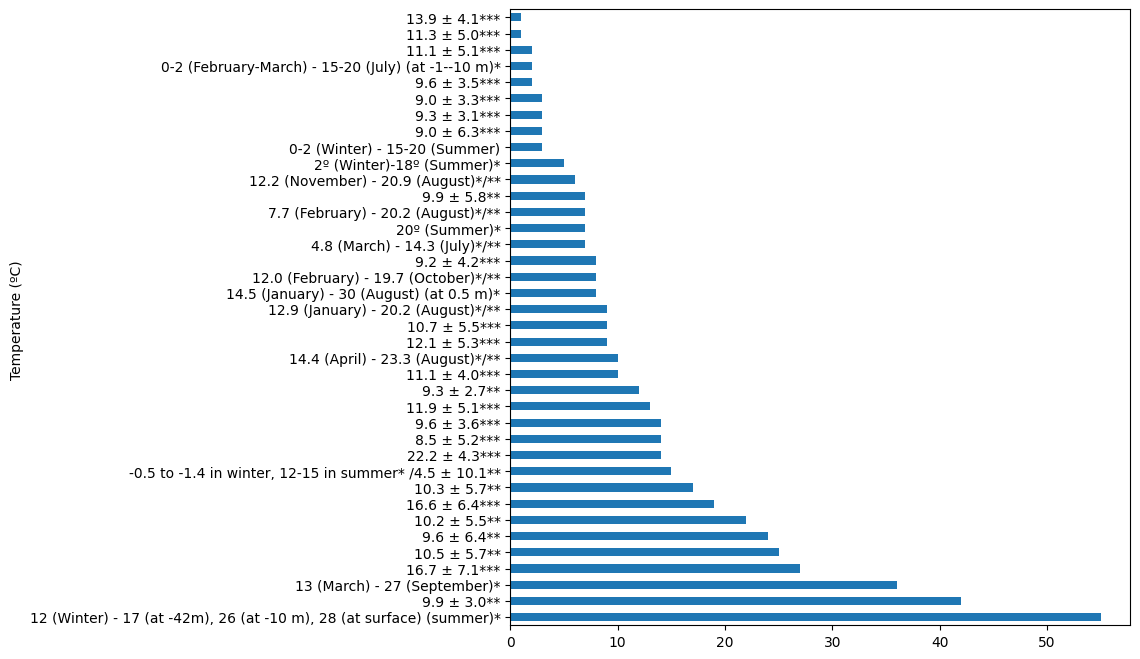

In [16]:
data['Temperature (ºC) '].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

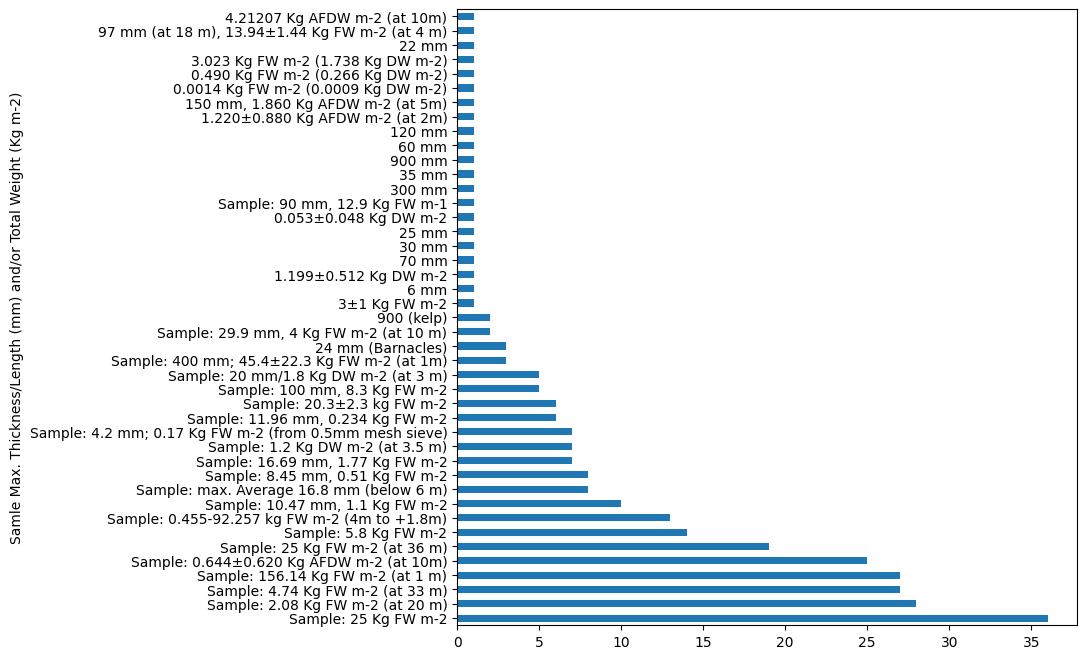

In [17]:
data['Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2)'].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

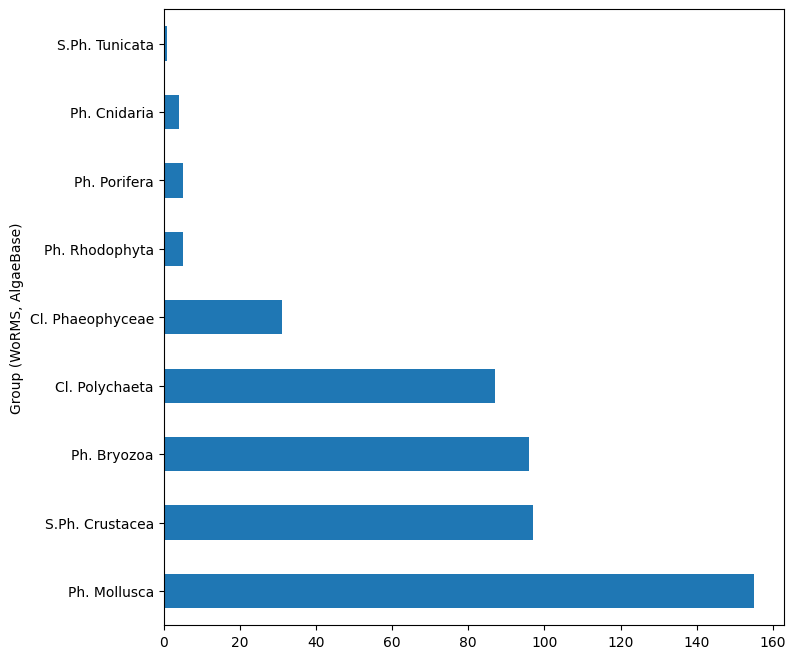

In [18]:
data['Group (WoRMS, AlgaeBase)'].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

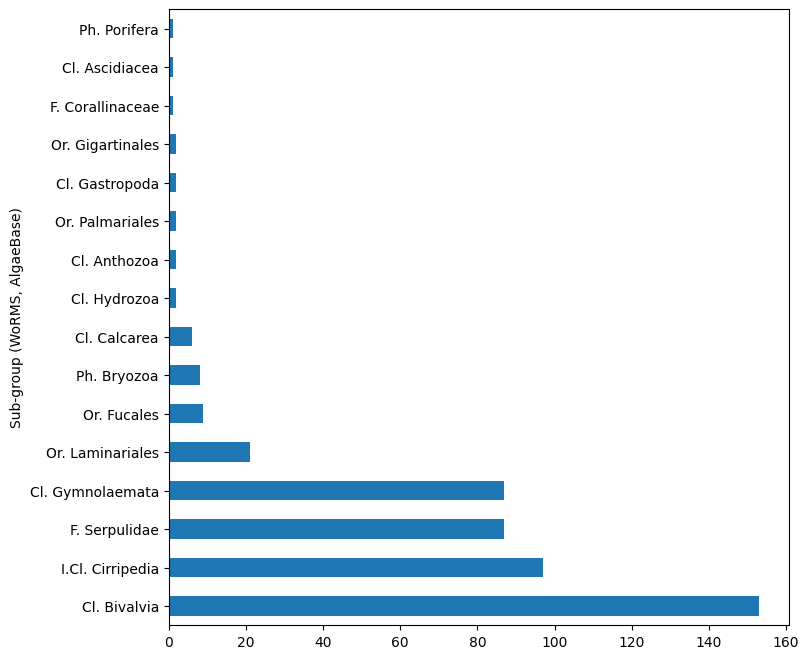

In [19]:
data['Sub-group (WoRMS, AlgaeBase)'].value_counts().plot(kind='barh',figsize=(8,8))
plt.show()

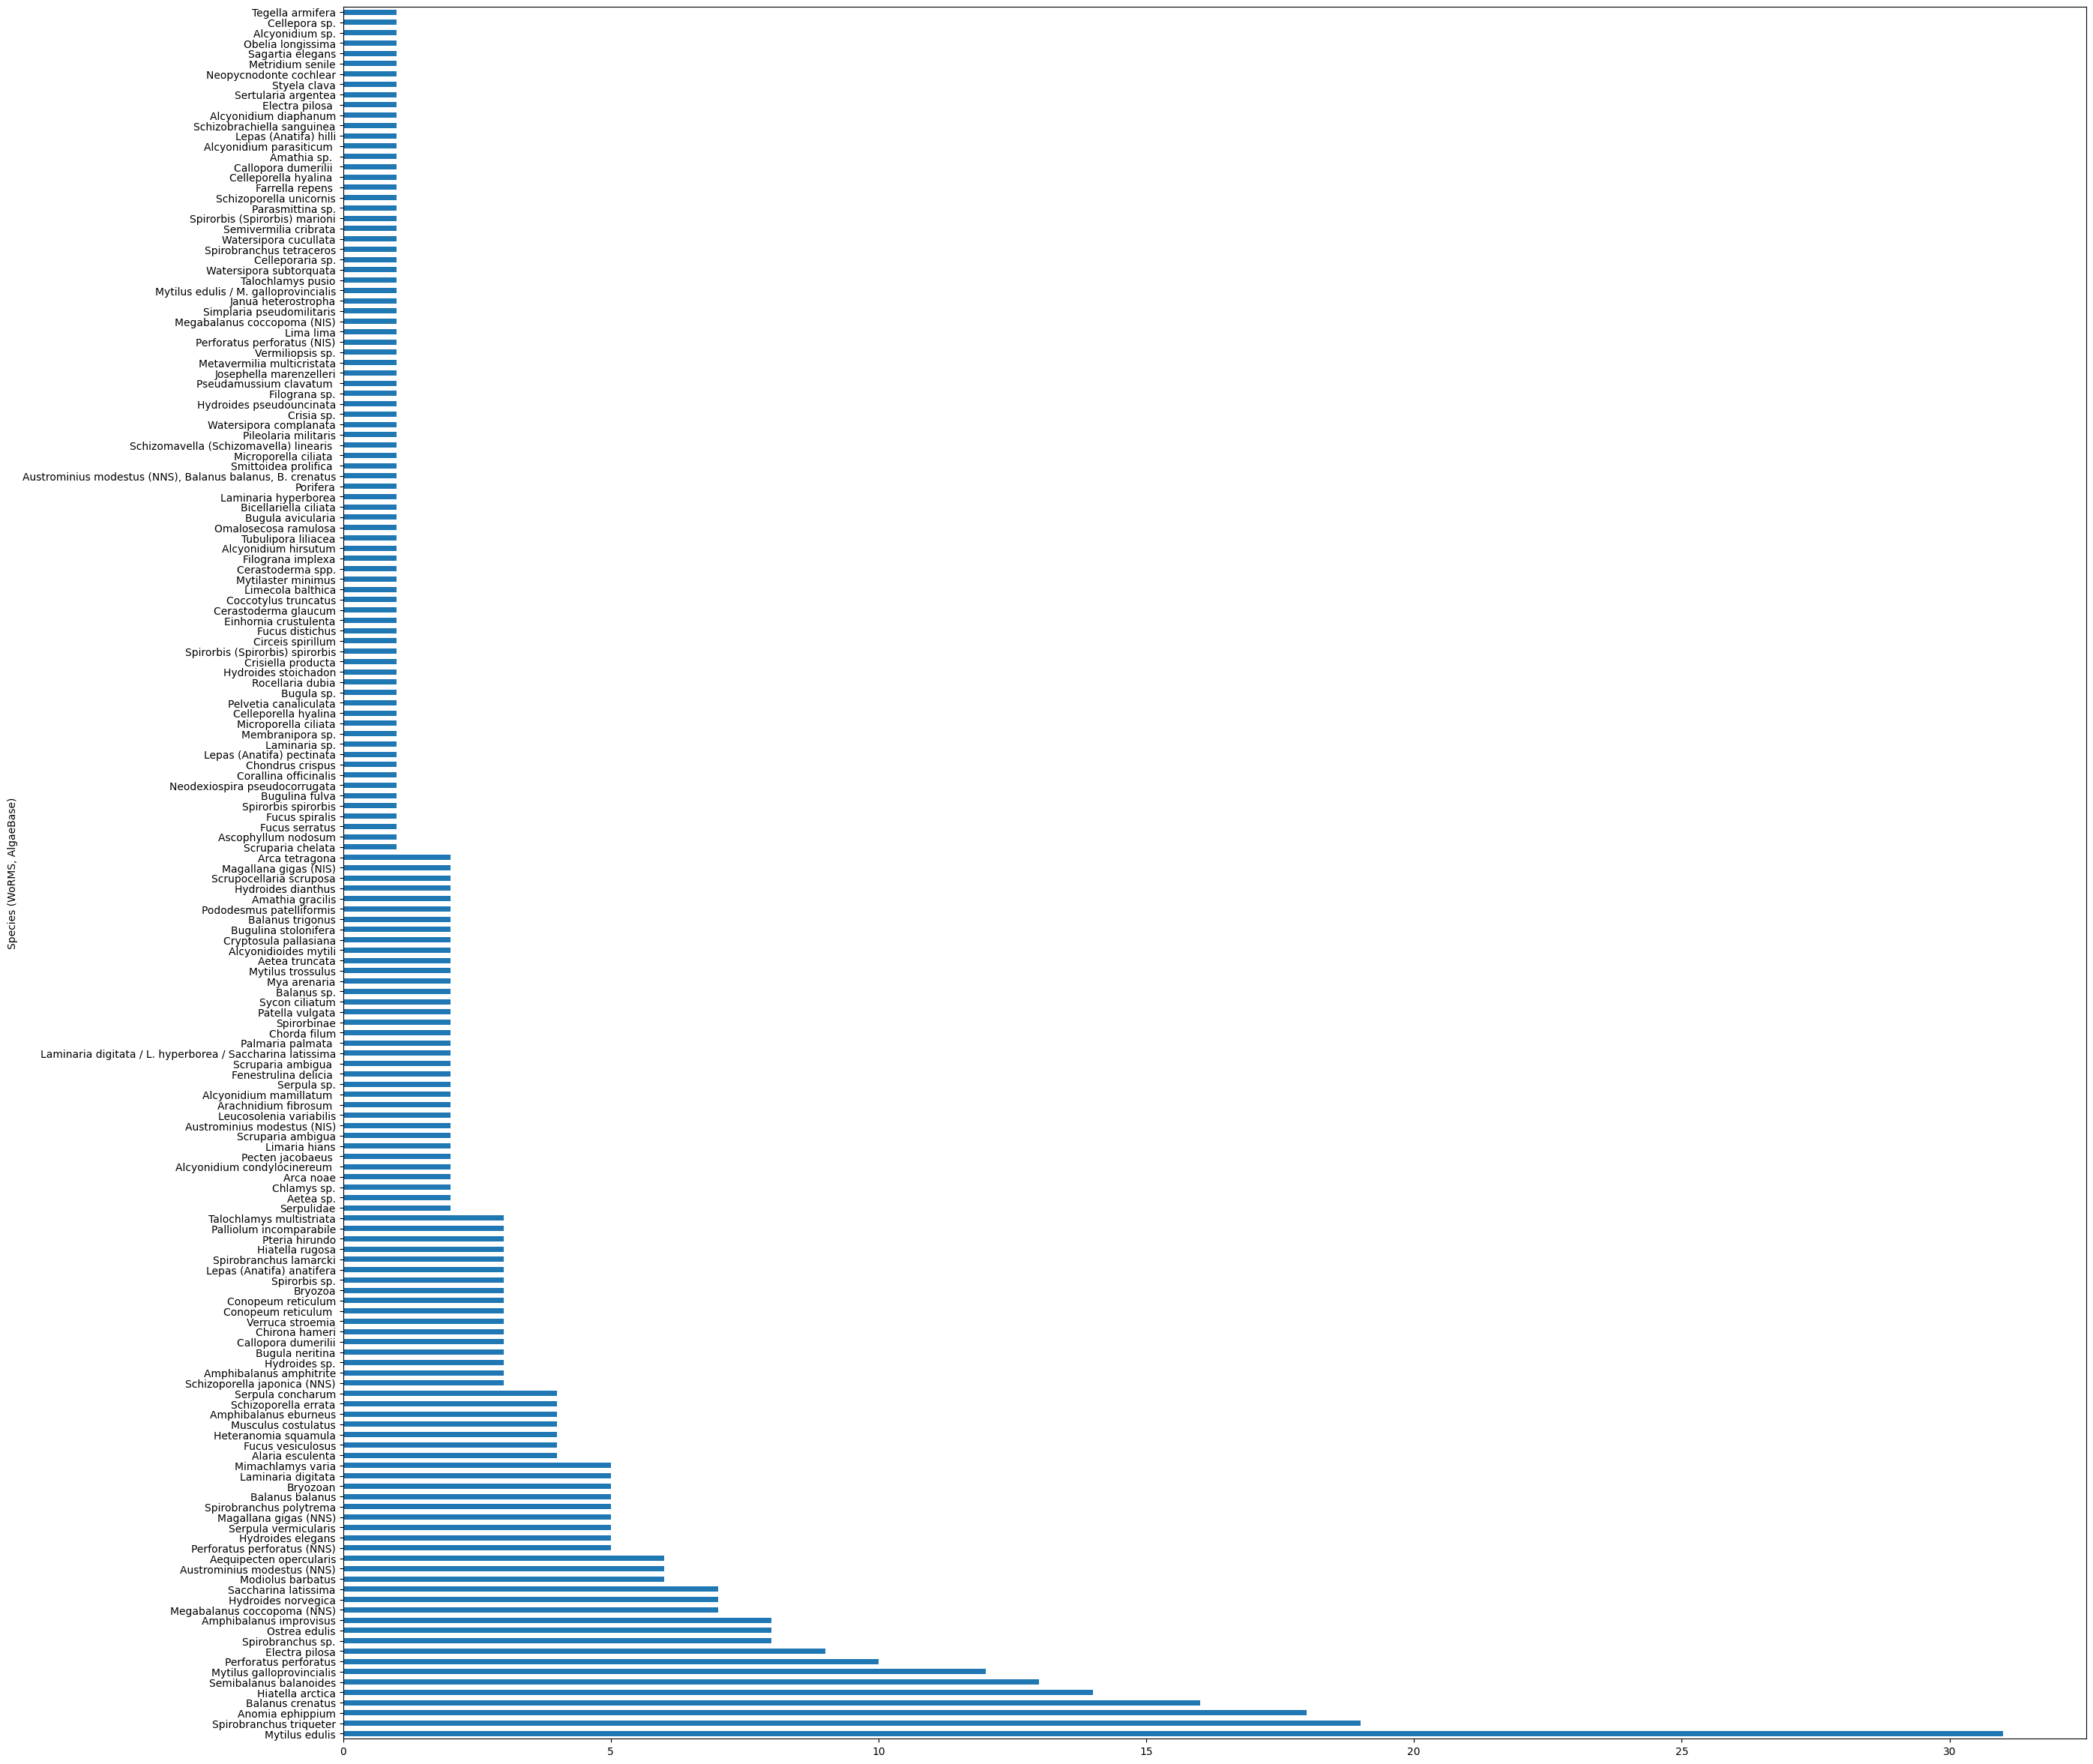

In [20]:
data['Species (WoRMS, AlgaeBase)'].value_counts().plot(kind='barh',figsize=(30,30))
plt.show()

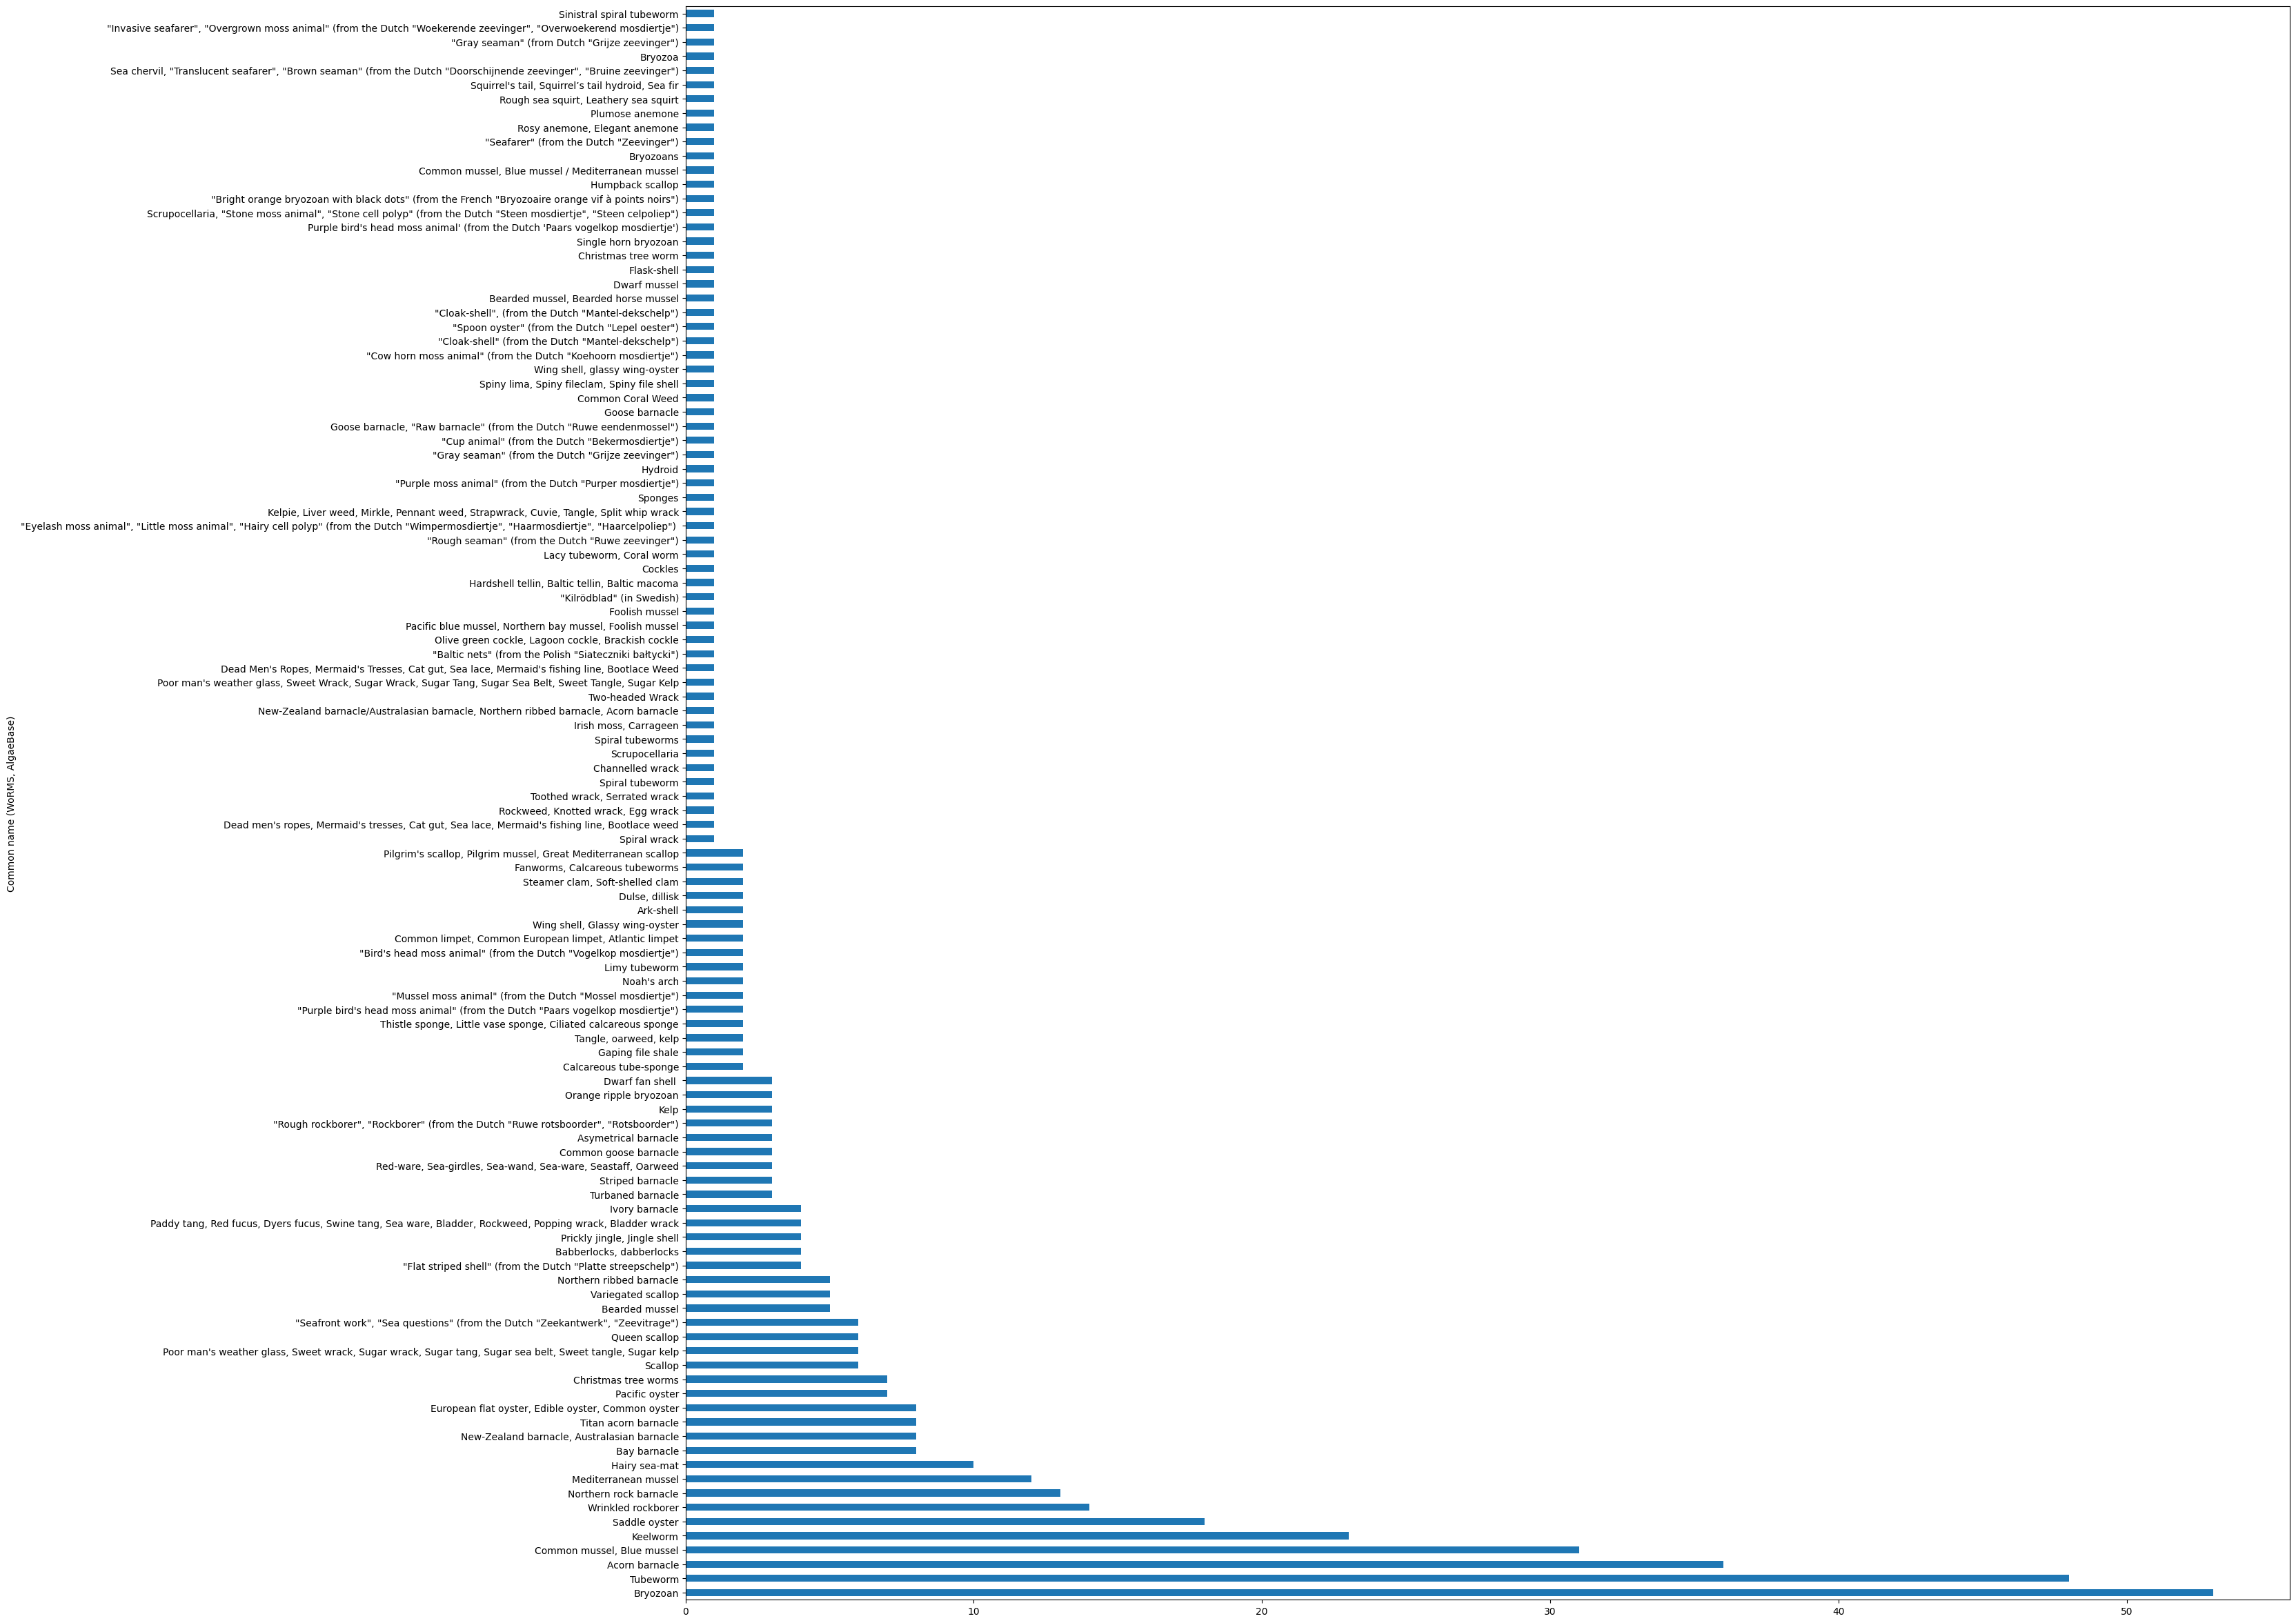

In [21]:
data['Common name (WoRMS, AlgaeBase)'].value_counts().plot(kind='barh',figsize=(30,30))
plt.show()

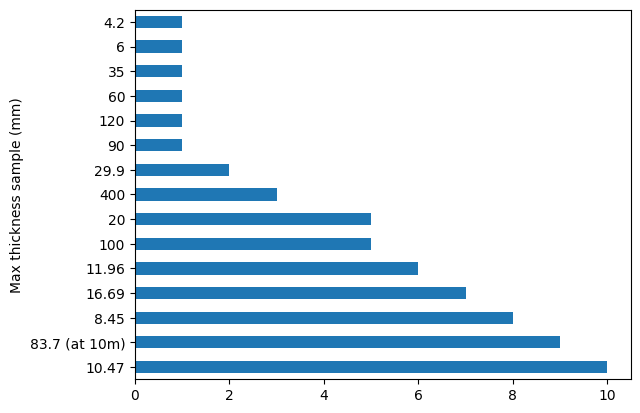

In [22]:
data['Max thickness sample (mm)'].value_counts().plot(kind='barh')
plt.show()

In [23]:
data=data.drop(columns={'Equipment','Group (WoRMS, AlgaeBase)','Species (WoRMS, AlgaeBase)','Common name (WoRMS, AlgaeBase)','F.P. min (months)','Depth (m)','Samle Max. Thickness/Length (mm) and/or Total Weight (Kg m-2)'})
data

,Distance to land (Km),F.P. max (months),Depth min (m),Depth max (m),Temperature (ºC),Max thickness sample (mm),"Sub-group (WoRMS, AlgaeBase)"
Coordinates,,,,,,,
"47º16'58.80''N, 2º39'54.00''W",20,19,0?,25?,13.9 ± 4.1***,90,Cl. Bivalvia
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),Ph. Bryozoa
...,...,...,...,...,...,...,...
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,I.Cl. Cirripedia
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,I.Cl. Cirripedia
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,Cl. Gymnolaemata


In [24]:
data=data[data['Distance to land (Km)']!='48-177']
data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('Onshore','0.1')
data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('onshore-0.4','0.1-0.4')
data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('30-50?','50')
data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('0.1-0.4','0.3')
data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('0-3','2')

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/3167605686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('Onshore','0.1')
/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/3167605686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance to land (Km)']=data['Distance to land (Km)'].astype(str).replace('onshore-0.4','0.1-0.4')
/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykern

In [25]:
data=data[(data['F.P. max (months)']!='?') & (data['F.P. max (months)']!='300?') & (data['F.P. max (months)']!='11?') & (data['F.P. max (months)']!='20?')& (data['F.P. max (months)']!='3.5')& (data['F.P. max (months)']!='7.5')]
data

,Distance to land (Km),F.P. max (months),Depth min (m),Depth max (m),Temperature (ºC),Max thickness sample (mm),"Sub-group (WoRMS, AlgaeBase)"
Coordinates,,,,,,,
"47º16'58.80''N, 2º39'54.00''W",20,19,0?,25?,13.9 ± 4.1***,90,Cl. Bivalvia
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),F. Serpulidae
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,12.9 (January) - 20.2 (August)*/**,83.7 (at 10m),Ph. Bryozoa
...,...,...,...,...,...,...,...
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,I.Cl. Cirripedia
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,I.Cl. Cirripedia
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,"-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ...",NaN,Cl. Gymnolaemata


In [26]:
data=data[(data['Depth min (m)']!='Intertidal') & (data['Depth min (m)']!='Low intertidal') & (data['Depth min (m)']!='High intertidal') & (data['Depth min (m)']!='-')]

In [27]:
data['Depth min (m)']=data['Depth min (m)'].replace('0?','0')

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/3113574713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depth min (m)']=data['Depth min (m)'].replace('0?','0')


In [28]:
data['Depth max (m)']=data['Depth max (m)'].replace('1?','1')
data['Depth max (m)']=data['Depth max (m)'].replace('25?','25')

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/2143295268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depth max (m)']=data['Depth max (m)'].replace('1?','1')
/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/2143295268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depth max (m)']=data['Depth max (m)'].replace('25?','25')


In [29]:
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('12 (Winter) - 17 (at -42m), 26 (at -10 m), 28 (at surface) (summer)*','21 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('13 (March) - 27 (September)*','20 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('-0.5 to -1.4 in winter, 12-15 in summer* /4.5 ± 10.1**','4.5 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('14.4 (April) - 23.3 (August)*/**','19 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('12.9 (January) - 20.2 (August)*/**','17 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('12.0 (February) - 19.7 (October)*/**','16 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('14.5 (January) - 30 (August) (at 0.5 m)*','22 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('4.8 (March) - 14.3 (July)*/** ','10 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('7.7 (February) - 20.2 (August)*/**','14 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('12.2 (November) - 20.9 (August)*/**','17 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('2º (Winter)-18º (Summer)*','9 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('0-2 (February-March) - 15-20 (July) (at -1--10 m)*','9 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('4.8 (March) - 14.3 (July)*/**','10 ± 0')
data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('0-2 (Winter) - 15-20 (Summer)','9 ± 0')

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/734343190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('12 (Winter) - 17 (at -42m), 26 (at -10 m), 28 (at surface) (summer)*','21 ± 0')
/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/734343190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature (ºC) ']=data['Temperature (ºC) '].replace('13 (March) - 27 (September)*','20 ± 0')
/var/folders/rw/1f

In [30]:
data['Temperature (ºC) mean'] = data['Temperature (ºC) '].str.split('±').str[0]

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/1828440831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Temperature (ºC) mean'] = data['Temperature (ºC) '].str.split('±').str[0]


In [31]:
data=data.drop(columns={'Temperature (ºC) '})
data

,Distance to land (Km),F.P. max (months),Depth min (m),Depth max (m),Max thickness sample (mm),"Sub-group (WoRMS, AlgaeBase)",Temperature (ºC) mean
Coordinates,,,,,,,
"47º16'58.80''N, 2º39'54.00''W",20,19,0,25,90,Cl. Bivalvia,13.9
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,83.7 (at 10m),F. Serpulidae,17
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,83.7 (at 10m),F. Serpulidae,17
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,83.7 (at 10m),F. Serpulidae,17
"39°22'56.64""N, 9°18'58.68""W",0.4,12,5,10,83.7 (at 10m),Ph. Bryozoa,17
...,...,...,...,...,...,...,...
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,NaN,I.Cl. Cirripedia,4.5
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,NaN,I.Cl. Cirripedia,4.5
"66º20'14.4''N, 33º38'12.6''E",0.1,13,1.5,1.5,NaN,Cl. Gymnolaemata,4.5


In [32]:
data['Max thickness sample (mm)']=data['Max thickness sample (mm)'].replace('83.7 (at 10m)','83.7')

In [33]:
data['Max thickness sample (mm)']=data['Max thickness sample (mm)'].astype(float).interpolate(method='linear')

In [34]:
data=data.dropna()
data[['Distance to land (Km)','F.P. max (months)','Depth min (m)','Depth max (m)','Max thickness sample (mm)','Temperature (ºC) mean']]=data[['Distance to land (Km)','F.P. max (months)','Depth min (m)','Depth max (m)','Max thickness sample (mm)','Temperature (ºC) mean']].astype(float)
data=data[['Distance to land (Km)','Depth min (m)','Depth max (m)','Temperature (ºC) mean','Max thickness sample (mm)','F.P. max (months)','Sub-group (WoRMS, AlgaeBase)']].reset_index()
data.drop(columns={'Coordinates'},inplace=True)
data

/var/folders/rw/1fjgxsgn4d9681wggjq0wxm40000gn/T/ipykernel_2733/1070063750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Distance to land (Km)','F.P. max (months)','Depth min (m)','Depth max (m)','Max thickness sample (mm)','Temperature (ºC) mean']]=data[['Distance to land (Km)','F.P. max (months)','Depth min (m)','Depth max (m)','Max thickness sample (mm)','Temperature (ºC) mean']].astype(float)


,Distance to land (Km),Depth min (m),Depth max (m),Temperature (ºC) mean,Max thickness sample (mm),F.P. max (months),"Sub-group (WoRMS, AlgaeBase)"
0,20.0,0.0,25.0,13.9,90.0,19.0,Cl. Bivalvia
1,0.4,5.0,10.0,17.0,83.7,12.0,F. Serpulidae
2,0.4,5.0,10.0,17.0,83.7,12.0,F. Serpulidae
3,0.4,5.0,10.0,17.0,83.7,12.0,F. Serpulidae
4,0.4,5.0,10.0,17.0,83.7,12.0,Ph. Bryozoa
...,...,...,...,...,...,...,...
388,0.1,1.5,1.5,4.5,20.0,13.0,I.Cl. Cirripedia
389,0.1,1.5,1.5,4.5,20.0,13.0,I.Cl. Cirripedia
390,0.1,1.5,1.5,4.5,20.0,13.0,Cl. Gymnolaemata
391,0.1,1.5,1.5,4.5,20.0,13.0,Cl. Gymnolaemata


In [35]:
data.to_excel('./dataset_no_resample.xlsx',engine='openpyxl')

Bilanciamento Classi Dataset 

In [2]:
data=pd.read_excel('./dataset_no_resample.xlsx',engine='openpyxl',index_col=0)
data

,Distance to land (Km),Depth min (m),Depth max (m),Temperature (ºC) mean,Max thickness sample (mm),F.P. max (months),"Sub-group (WoRMS, AlgaeBase)"
0,20.0,0.0,25.0,13.9,90.0,19,Cl. Bivalvia
1,0.4,5.0,10.0,17.0,83.7,12,F. Serpulidae
2,0.4,5.0,10.0,17.0,83.7,12,F. Serpulidae
3,0.4,5.0,10.0,17.0,83.7,12,F. Serpulidae
4,0.4,5.0,10.0,17.0,83.7,12,Ph. Bryozoa
...,...,...,...,...,...,...,...
388,0.1,1.5,1.5,4.5,20.0,13,I.Cl. Cirripedia
389,0.1,1.5,1.5,4.5,20.0,13,I.Cl. Cirripedia
390,0.1,1.5,1.5,4.5,20.0,13,Cl. Gymnolaemata
391,0.1,1.5,1.5,4.5,20.0,13,Cl. Gymnolaemata


In [3]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
object_columns = data.select_dtypes(include=['object']).columns

In [4]:
label_encoder = LabelEncoder()
for col in object_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [5]:
data

,Distance to land (Km),Depth min (m),Depth max (m),Temperature (ºC) mean,Max thickness sample (mm),F.P. max (months),"Sub-group (WoRMS, AlgaeBase)"
0,20.0,0.0,25.0,13.9,90.0,19,2
1,0.4,5.0,10.0,17.0,83.7,12,7
2,0.4,5.0,10.0,17.0,83.7,12,7
3,0.4,5.0,10.0,17.0,83.7,12,7
4,0.4,5.0,10.0,17.0,83.7,12,12
...,...,...,...,...,...,...,...
388,0.1,1.5,1.5,4.5,20.0,13,8
389,0.1,1.5,1.5,4.5,20.0,13,8
390,0.1,1.5,1.5,4.5,20.0,13,4
391,0.1,1.5,1.5,4.5,20.0,13,4


In [6]:
X = data.drop('Sub-group (WoRMS, AlgaeBase)', axis=1)
y = data['Sub-group (WoRMS, AlgaeBase)']

In [7]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler()
X,y=ros.fit_resample(X,y)
print((Counter(y)))

Counter({2: 127, 7: 127, 12: 127, 8: 127, 6: 127, 4: 127, 9: 127, 5: 127, 0: 127, 1: 127, 3: 127, 10: 127, 11: 127, 13: 127})


In [8]:
X

,Distance to land (Km),Depth min (m),Depth max (m),Temperature (ºC) mean,Max thickness sample (mm),F.P. max (months)
0,20.00,0.0,25.0,13.9,90.000000,19
1,0.40,5.0,10.0,17.0,83.700000,12
2,0.40,5.0,10.0,17.0,83.700000,12
3,0.40,5.0,10.0,17.0,83.700000,12
4,0.40,5.0,10.0,17.0,83.700000,12
...,...,...,...,...,...,...
1773,0.95,22.0,22.0,10.0,7.468966,11
1774,0.95,22.0,22.0,10.0,7.468966,11
1775,0.95,22.0,22.0,10.0,7.468966,11
1776,0.95,22.0,22.0,10.0,7.468966,11


In [9]:
y

0        2
1        7
2        7
3        7
4       12
        ..
1773    13
1774    13
1775    13
1776    13
1777    13
Name: Sub-group (WoRMS, AlgaeBase), Length: 1778, dtype: int64

Creazione modelli di classificazione (in base al dataset provo a prevedere il tipo di alga che è l'etichetta)

Nota che ogni riga del dataset rappresenta 1 esempio con  la propria etichetta 

In [10]:
import tensorflow as tf
import sklearn
from sklearn.metrics import f1_score
import math
import random
import operator
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,roc_curve,auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers  
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.models import Sequential
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import pickle as pkl
import warnings
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout,MaxPool2D
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.applications.inception_v3 import InceptionV3
#import torch
#from torchvision import datasets, transforms
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [11]:
def saveM(model,fname):
    fname=fname+'.model'
    pkl.dump(model, open(fname, 'wb'))

def loadM(fname):
    return pkl.load(open(fname+'.model', 'rb'))

In [12]:
def tuningRandomForest(X_train,y_train):
    param_rf_grid = {'n_estimators': [10,50,100],
                 'max_depth': [25,50,75,100]}
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf,param_rf_grid, n_jobs = -1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_rf = grid_search.best_estimator_
    return best_rf


def tuningAdaBoostClassifier(X_train,y_train):
    param_ada_grid={'n_estimators':[10,50,100,500],
                    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
                   }
    ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm='SAMME.R')
    grid_search=GridSearchCV(ada,param_ada_grid,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_ada = grid_search.best_estimator_
    return best_ada


def tuningKNN(X_train,y_train,knn):
    params = {'n_neighbors': range(1, 21, 2),
              'weights':['uniform','distance'],
              'metric':['euclidean', 'manhattan', 'minkowski']
             }
    grid_search = GridSearchCV(knn, params,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_KNN = grid_search.best_estimator_
    return best_KNN

def tuningSVC(X_train,y_train,svc):
    param_svc_grid ={'kernel': ['poly', 'linear', 'rbf','sigmoid'],
                      'C' : [500, 300 ,200, 150, 100, 50, 10, 1],
                     'gamma': ['scale']
                    }
    grid_search = GridSearchCV(svc, param_svc_grid,scoring='accuracy',n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Best Param:", grid_search.best_params_)
    best_svc = grid_search.best_estimator_
    return best_svc


class MyClassificatorTrain(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        return self

    def transform(self, X,y):
        #X=X.reshape(len(X),100*100)
        X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                     test_size=0.2,shuffle=True)
        print("Training modelli...")
        print("AdaBoost...")
        ada_best=tuningAdaBoostClassifier(X_train,y_train)
        print("Tuning SVC...")
        svc_clf=SVC()
        svc_best = tuningSVC(X_train,y_train,svc_clf)
        print("Tuning KNN...")
        knn_clf=KNeighborsClassifier()
        knn_best=tuningKNN(X_train,y_train,knn_clf)
        print("Random Forest...")
        rf_best=tuningRandomForest(X_train,y_train)
        print("Fatto!")

Non si esegue questa cella che è lunga e serve a scegliere il miglior settaggio per ogni calssificatore

In [37]:
MyClassificatorTrain().transform(X,y)

Training modelli...
AdaBoost...
Best Param: {'learning _rate': 0.001,'n estimators': 500}
Tuning SVC...
Best Param:{'C': 500,'gamma':'scale','kernel':rbf
Tuning KNN...
Best Param:{'metric':'manhattan', 'n neighbors': 1,'weights':'uniform'}
Random Forest...
Best Param: {'max depth': 25,'n estimators': 50}
Fatto!


Test classificatori con validazione incrociata stratificata (ogni sacca ha gli esempi di tutte le classi preservando la proporzione tra queste del dataset completo) a 10 sacche 

In [14]:
strkf=StratifiedKFold(n_splits=10)
score_KFold=[]

In [15]:
def compute_performance(estimator,strkf,X, y):
    score = cross_validate(estimator, X ,y,cv=strkf ,scoring='accuracy',return_estimator=True,n_jobs=-1)
    model=score['estimator']
    results=score['test_score']
    mean_accuracy=np.round(np.mean(results),3)
    mean_std= np.round(np.std(results),3)
    maxAcc=np.round((np.max(results)),3)
    argMaxAcc=np.argmax(results)
    saveM(model[argMaxAcc],estimator.__class__.__name__)
    print("L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore ")
    print(results)
    print("Ottenendo un'accuratezza media di " + str(mean_accuracy)+" con deviazione standard di "+ str(mean_std))
    print("La migliore accuratezza e' "+ str(maxAcc) + " ottenuta nello split numero " + str(argMaxAcc+1))
    print("Salvo il modello ottenuto nello split numero " + str(argMaxAcc+1))
    print("Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero " + str(argMaxAcc+1))
    test_fold=[]
    for train_index, test_index in strkf.split(X, y):
            test_fold.append(test_index)
    #print(X[X.index.isin(test_fold[argMaxAcc])])
    #print(y[y.index.isin(test_fold[argMaxAcc])])
    confusionMat(model[argMaxAcc],X[X.index.isin(test_fold[argMaxAcc])],y[y.index.isin(test_fold[argMaxAcc])])
    return (mean_accuracy,mean_std)

In [16]:
def confusionMat(clf,X_test,y_test):
    pred = clf.predict(X_test)
    score=accuracy_score(y_test, pred)
    ax =sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.1f', cmap=sns.color_palette("Reds", 25))
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5) 
    plt.show()
    if(clf.__class__.__name__==AdaBoostClassifier):
        print(classification_report(y_test, pred,zero_division=1,labels=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))
    else:
        print(classification_report(y_test, pred,labels=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))


Risultati

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.5        0.54494382 0.51123596 0.46067416 0.56741573 0.44382022
 0.43258427 0.48876404 0.49152542 0.46327684]
Ottenendo un'accuratezza media di 0.49 con deviazione standard di 0.041
La migliore accuratezza e' 0.567 ottenuta nello split numero 5
Salvo il modello ottenuto nello split numero 5
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 5


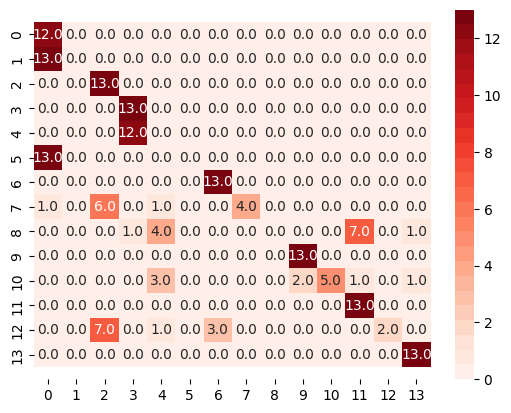

              precision    recall  f1-score   support

           0       0.31      1.00      0.47        12
           1       0.00      0.00      0.00        13
           2       0.50      1.00      0.67        13
           3       0.50      1.00      0.67        13
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        13
           6       0.81      1.00      0.90        13
           7       1.00      0.33      0.50        12
           8       0.00      0.00      0.00        13
           9       0.87      1.00      0.93        13
          10       1.00      0.42      0.59        12
          11       0.62      1.00      0.76        13
          12       1.00      0.15      0.27        13
          13       0.87      1.00      0.93        13

    accuracy                           0.57       178
   macro avg       0.53      0.56      0.48       178
weighted avg       0.53      0.57      0.48       178



/Users/emiliocasella/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emiliocasella/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emiliocasella/miniforge3/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [17]:
clf_ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500, learning_rate=0.001,algorithm='SAMME.R')
mean_ada,std_ada=compute_performance(clf_ada,strkf,X, y)
score_KFold.append((mean_ada,std_ada))

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.75280899 0.74719101 0.79213483 0.83707865 0.81460674 0.74719101
 0.80898876 0.8258427  0.84180791 0.80225989]
Ottenendo un'accuratezza media di 0.797 con deviazione standard di 0.034
La migliore accuratezza e' 0.842 ottenuta nello split numero 9
Salvo il modello ottenuto nello split numero 9
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 9


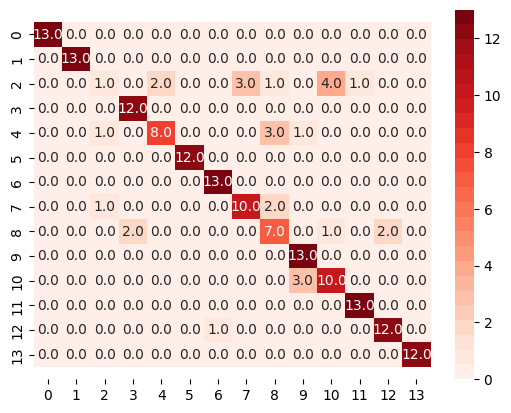

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       0.33      0.08      0.13        12
           3       0.86      1.00      0.92        12
           4       0.80      0.62      0.70        13
           5       1.00      1.00      1.00        12
           6       0.93      1.00      0.96        13
           7       0.77      0.77      0.77        13
           8       0.54      0.58      0.56        12
           9       0.76      1.00      0.87        13
          10       0.67      0.77      0.71        13
          11       0.93      1.00      0.96        13
          12       0.86      0.92      0.89        13
          13       1.00      1.00      1.00        12

    accuracy                           0.84       177
   macro avg       0.82      0.84      0.82       177
weighted avg       0.82      0.84      0.82       177



In [18]:
clf_svc=SVC(kernel='rbf', C=500, gamma='scale')
mean_svc,std_svc=compute_performance(clf_svc,strkf,X, y)
score_KFold.append((mean_svc,std_svc))

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.75280899 0.75842697 0.83707865 0.87640449 0.80898876 0.79213483
 0.81460674 0.87640449 0.79661017 0.81920904]
Ottenendo un'accuratezza media di 0.813 con deviazione standard di 0.04
La migliore accuratezza e' 0.876 ottenuta nello split numero 4
Salvo il modello ottenuto nello split numero 4
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 4


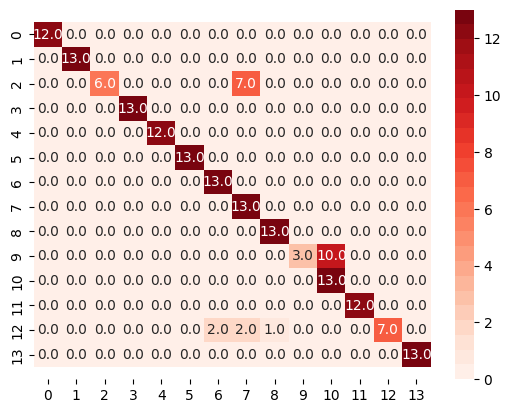

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      0.46      0.63        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       0.87      1.00      0.93        13
           7       0.59      1.00      0.74        13
           8       0.93      1.00      0.96        13
           9       1.00      0.23      0.38        13
          10       0.57      1.00      0.72        13
          11       1.00      1.00      1.00        12
          12       1.00      0.58      0.74        12
          13       1.00      1.00      1.00        13

    accuracy                           0.88       178
   macro avg       0.93      0.88      0.86       178
weighted avg       0.92      0.88      0.86       178



In [19]:
clf_knn=KNeighborsClassifier(n_neighbors=1, weights='uniform',metric='manhattan')
mean_knn,std_knn=compute_performance(clf_knn,strkf,X, y)
score_KFold.append((mean_knn,std_knn))

L'accuratezza per ogni sacca della cross validation è rappresentata dal seguente vettore 
[0.80337079 0.84831461 0.85393258 0.92696629 0.89325843 0.84269663
 0.84831461 0.91573034 0.90960452 0.88700565]
Ottenendo un'accuratezza media di 0.873 con deviazione standard di 0.037
La migliore accuratezza e' 0.927 ottenuta nello split numero 4
Salvo il modello ottenuto nello split numero 4
Si mostra ora la matrice di adiacenza ottenuta sul test set dello split numero 4


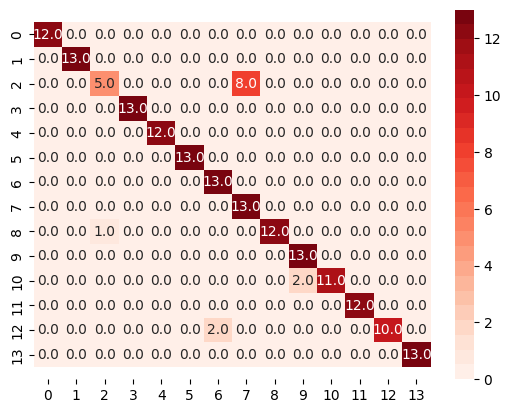

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       0.83      0.38      0.53        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       0.87      1.00      0.93        13
           7       0.62      1.00      0.76        13
           8       1.00      0.92      0.96        13
           9       0.87      1.00      0.93        13
          10       1.00      0.85      0.92        13
          11       1.00      1.00      1.00        12
          12       1.00      0.83      0.91        12
          13       1.00      1.00      1.00        13

    accuracy                           0.93       178
   macro avg       0.94      0.93      0.92       178
weighted avg       0.94      0.93      0.92       178



In [20]:
clf_rf = RandomForestClassifier(random_state=42,n_estimators=50,max_depth=25)
mean_rf,std_rf=compute_performance(clf_rf,strkf,X, y)
score_KFold.append((mean_rf,std_rf))

In [21]:
score_KFold

[(0.49, 0.041), (0.797, 0.034), (0.813, 0.04), (0.873, 0.037)]

In [22]:
score_df = pd.DataFrame(score_KFold,index=['AdaBoost','SVC','KNN','RF'],columns=['accuracy_mean','std'])

In [32]:
def foldPlot(score_KFold,labels):
    values=[]
    for i,j in score_KFold:
        values.append(i)
        values.append(j)  
    plt.figure()
    c=['green','yellow','blue','red']
    data=np.array(values).reshape(len(labels),2)
    accuracy=data[:,0]
    stdr=data[:,1]
    std=data[:,1]/np.max(data[:,1])
    size=[500]*10  
    for i in range(len(c)):
        l=labels[i]
        acc=accuracy[i]
        sx=stdr[i]
        plt.scatter([acc],[acc],s=std[i]*acc*2000,color=[c[i]])
        st1="{0} Acc:{1:.2f}%".format(l,acc*100.0)
        plt.scatter([], [], color=[c[i]], s=std[i]*200,
                label=st1+" ")
    plt.grid(linestyle="--")
    plt.legend(loc='lower left', bbox_to_anchor=(0.4, 1),
          ncol=1, fancybox=True, shadow=True)
    plt.axis([np.min(accuracy)-.05, np.max(accuracy)+.05,np.min(accuracy)-.05, np.max(accuracy)+.05])
    plt.show()

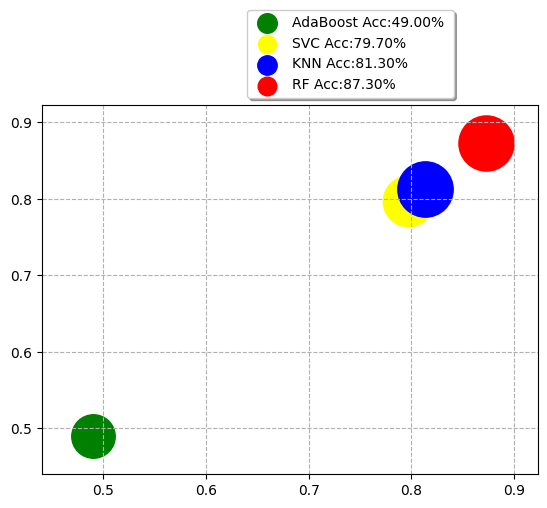

In [33]:
labels=score_df.index.values
foldPlot(score_KFold,labels)